In [25]:
import pandas as pd
from sklearn.datasets import make_regression
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Generate Sample data 
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [17]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [19]:
df.head()

,feature1,feature2,target
0,0.125264,-0.289493,-38.706422
1,0.489321,-0.165427,51.300419
2,-1.093928,-1.769880,-95.331115
3,1.942964,0.727504,143.386729
4,-1.262232,-0.818273,-148.578949


In [21]:
df.shape

(100, 3)

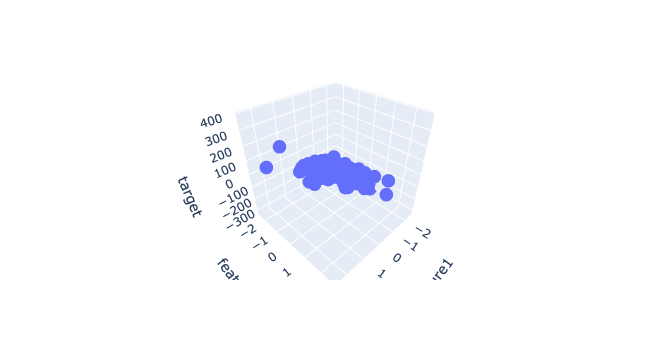

In [26]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()

In [27]:
from sklearn.model_selection import train_test_split
# divide data into four arrays, two for training and two for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [34]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  32.934283837718795
Mean Squared Error:  1585.0000067002948
R2 score:  0.7886841196116241


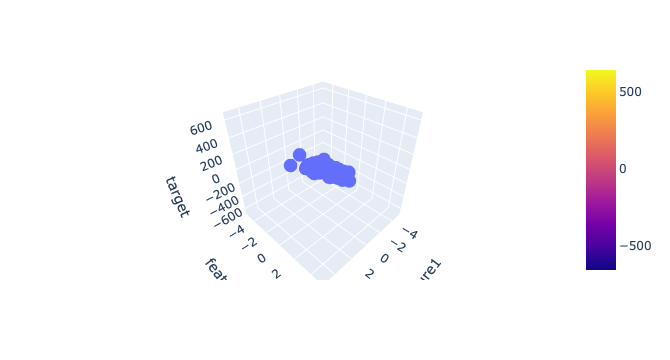

In [41]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

xGrid,yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x=y, y=y,z=z))

fig.show()



In [42]:
lr.coef_

array([43.25136894, 86.70922646])

In [43]:
lr.intercept_

-8.455520733320572